# Government Funding Space Projects - FAPESP

While at AEB, I was tasked to study and analyze the open library of projects funded by FAPESP, an institution from the state of São Paulo that provide funds to scientific research to universities and companies, so that the agency could start drafting a proposal of partnership with them.

So, in this work, I perform an EDA of the data available at their open library, in order to provide insights and rationale for the best course of action AEB could take regarding FAPESP

## Initializing the code

first things first, the tools we'll be using througout the work need to be imported to the workspace. In this case we'll be using _Pandas_ for data manipulation and mostly _Seaborn_ and _Matplotlib_ for graphic generation and visualization

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

And also open the dataset

In [3]:
dataset = pd.read_excel('dataset-space-projects.xlsx')

## Visualizing the Dataset

To start the analysis, let's take an overview look at the dataframe.

In [4]:
dataset.head()

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Data de Início,Data de Término,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30
0,21/12066-2,Desenvolvimento de Bateria Aeronáutica Modular...,Development of High-performance Modular Aerona...,Arthur Roza Augusto,NaN,NaN,NaN,NaN,NaN,Arthur Roza Augusto,...,2022-03-01,2024-02-29,NaN,NaN,NaN,NaN,"Atualmente, aeronaves modernas e a segurança d...","Today, modern aircraft and flight safety are c...",21/15032-1,
1,20/13779-0,Máscara de furação aeronáutica reconfigurável ...,Numerical control drill jig,Glauber Lopes Mosqueira,NaN,NaN,NaN,Electroimpact do Brasil Indústria Aeroespacial...,Jacareí,Glauber Lopes Mosqueira,...,2021-12-01,2023-07-31,NaN,NaN,NaN,NaN,Máscaras de furação são o instrumento mais com...,Drill jigs are the most common tools used in t...,NaN,
2,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,2021-06-01,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,
3,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,2021-06-01,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,
4,20/05902-6,Inspeção dimensional portátil de furos por mét...,Portable dimensional inspection for holes by T...,Fabio do Monte Sena,NaN,NaN,NaN,Lume Tecnologia Ltda,São José dos Campos,Fabio do Monte Sena,...,2021-04-01,2022-03-31,NaN,NaN,NaN,NaN,"O volume de componentes, os requisitos dimensi...","The number of components, the dimensional requ...",21/02729-4; 21/02837-1; 21/03143-3; 21/08902-0,


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   N. Processo                                       208 non-null    object        
 1   Título (Português)                                208 non-null    object        
 2   Título (Inglês)                                   148 non-null    object        
 3   Beneficiário                                      208 non-null    object        
 4   Instituição                                       0 non-null      float64       
 5   Cidade Instituição                                0 non-null      float64       
 6   Instituição Parceira                              55 non-null     object        
 7   Empresa                                           152 non-null    object        
 8   Município                     

It is worth to say that this dataset contains all the projects related to aeroespace engeneering 

## Searching for core space technology

One of the requirements of this project was that it must be focused in core space technology. The space sector is so broad
and relates to so many diferent fields that narrowing that scope was more than necessary. So, since we were looking for projects related to core space technology, the next thing I needed to do was to filter the dataframe based on this requirement.

The strategy I adopted was to search for keywords related to the tech I was looking for in some descriptive columns of the dataset

In [6]:
keywords = ['lançador', 'satélite', 'foguete', 'inpe']
contains_keyword_resumo = [any(keyword in description.lower() for keyword in keywords) for description in dataset['Resumo (Português)'].fillna('')]
contains_keyword_assuntos = [any(keyword in description.lower() for keyword in keywords) for description in dataset['Assuntos'].fillna('')]

contains_keyword = [any(statement) for statement in zip(contains_keyword_resumo, contains_keyword_assuntos)]

dataset[contains_keyword]

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Data de Início,Data de Término,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30
2,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,2021-06-01,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,
3,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,2021-06-01,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,
7,20/05196-4,Pesquisa e desenvolvimento de constelação de s...,Satellite based precision agriculture IoT network,Luis Marcelo Coelho Acosta,NaN,NaN,NaN,Acosta Aeroespaço Engenharia e Serviços Especi...,São José dos Campos,Luis Marcelo Coelho Acosta,...,2021-03-01,2023-02-28,MCTI/MC,NaN,NaN,NaN,Este projeto objetiva ter uma rede IoT terrest...,This project aims to have a terrestrial IoT ne...,21/11875-4; 22/00146-4,
9,19/00983-0,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,São José dos Campos,Valter Ricardo Schad,...,2020-10-01,2021-06-30,NaN,NaN,NaN,NaN,"A presente proposta é de uma nova geração, em ...","The present proposal is a new generation, in t...",20/14645-7; 20/15273-6,
10,20/14645-7,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,NaN,NaN,Valter Ricardo Schad,...,2020-10-01,2021-06-30,NaN,NaN,NaN,NaN,O Bolsista será responsável pelo projeto como ...,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,99/09372-9,Desenvolvimento de terminal de usuário para tr...,NaN,Joel Muniz Bezerra,NaN,NaN,Databus Sankay Ltda,NaN,NaN,Joel Muniz Bezerra,...,1999-10-01,2002-12-31,NaN,NaN,NaN,NaN,"Desenvolvimento de antenas ativas impressas, p...",NaN,NaN,
204,99/06432-0,Linearizador pré-distorcivo para amplificadore...,Pre-distortion linearizer for high power ampli...,Wilton José Fleming,NaN,NaN,NaN,Beta Telecom Consultoria e Comércio Ltda,São José dos Campos,Wilton José Fleming,...,1999-10-01,2006-11-30,NaN,NaN,NaN,NaN,O presente trabalho propõe-se a investigar os ...,The present work is designed to investigate th...,NaN,
205,97/13253-0,Amplificador de baixo ruído com conversor de f...,Low noise amplifier with frequency converter i...,Alexandre Nunes da Trindade,NaN,NaN,NaN,Proqualit Telecon Ltda,Guararema,Alexandre Nunes da Trindade,...,1998-06-01,2003-05-31,NaN,NaN,NaN,NaN,O presente projeto consiste na especificação c...,The present project consists of the complete s...,98/07100-9; 04/13954-3,
206,97/07357-7,Desenvolvimento de refrigeradores baseados no ...,Development of refrigerators based on thermo-a...,Humberto Pontes Cardoso,NaN,NaN,NaN,Equatorial Sistemas S/A,São José dos Campos,Humberto Pontes Cardoso,...,1998-01-01,2001-08-31,NaN,NaN,NaN,NaN,Os recentes avanços no desenvolvimento de dete...,The recent progress in developing long-wave ph...,97/12916-5; 97/13711-8; 99/11968-7,


After that filtering, going through the data reveals that there are duplicated lines. These can happen for a number of reasons, but we will drop them to make the analysis cleaner.

In [7]:
space_projects = dataset[contains_keyword].drop_duplicates().reset_index(drop=True)

In [8]:
space_projects.shape

(96, 31)

And here we reach the mark of 96 projects that cite any of the keywords ("Lançador", "Satélite", "Foguete", "INPE"). Now, if we carefully analize the content of the projects, we can see that not all of them are directed to the space sector, some of the projects vaguely cite one of the keywords in a way that gets them through the filter, but don't really makes much sense being in the analysis, since they fit more in the aeronautics field. So, me and my team checked all of the projects and pinpointed those that should be excluded 

In [9]:
not_space_projects = [42, 51, 53, 56, 57, 62, 68, 74, 75, 77, 78, 79]

After that review, we can finally get to the final roast of projects to be further analized

In [10]:
space_projects = space_projects.drop(not_space_projects).reset_index(drop=True)

In [11]:
space_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   N. Processo                                       84 non-null     object        
 1   Título (Português)                                84 non-null     object        
 2   Título (Inglês)                                   70 non-null     object        
 3   Beneficiário                                      84 non-null     object        
 4   Instituição                                       0 non-null      float64       
 5   Cidade Instituição                                0 non-null      float64       
 6   Instituição Parceira                              17 non-null     object        
 7   Empresa                                           67 non-null     object        
 8   Município                       

## Unifying information on single column

There is one more adition to make. There are two columns in the dataset that serve the same function: record the name of the company that was granted that project. They are the _"Empresa"_ and _"Instituição Parceira"_ columns. Since the columns complement each other - meaning that whenever one is null, the other is filled - we can fuse them into one single column. I'll call it _"Entidade"_

In [12]:
space_projects['Entidade'] = np.where(space_projects['Empresa'].notna(),
                          space_projects['Empresa'],
                          space_projects['Instituição Parceira'])

Finally, With the number of projects reduced from 208 to 84 and all the companies organized in one single column, it's time to start the exploratory analysis

# Exploratory Data Analysis of the dataset

The objective here is to uncover ways that the Brazilian Space Agency could interact with FAPESP. Since FAPESP is a government entity that funds research and development initiatives, describing caracteristics of past funded projects can provide valuable insights as to how FAPESP operates and what kind of projects they tend to fund. Knowing that fact, the EDA will focus on this description, so that in the end, we can come up with a set of statements (and hopefully requirements) about how a FAPESP funded space project looks like.

To make the next graphics more eye-pleasing, I'll let seaborn set the layout for the following visualizations

In [49]:
sns.set_theme()

## How many projects each company was doing?

The first thing that came in to mind was to check how many projects companies did througout the time-span of the analysis. We can get this value if we count the number of projects each company did

In [16]:
space_projects['Entidade'].value_counts().head(10)

Cron Sistemas e Tecnologias Ltda. - EPP                  6
Fibraforte Engenharia Indústria e Comércio Ltda          6
Opto Tecnologia Optrônica Ltda                           5
Orbital Engenharia S/A                                   5
Guatifer Usinagem e Ferramentaria Ltda (Guatifer)        4
Essado de Morais Ltda. - ME                              3
Navcon Navegação e Controle Indústria e Comércio Ltda    2
Proqualit Telecon Ltda                                   2
Beta Telecom Consultoria e Comércio Ltda                 2
Geomap Ltda                                              2
Name: Entidade, dtype: int64

And now we count how many companies executes each number of projects

In [18]:
space_projects['Entidade'].value_counts().value_counts().sort_index()

1    25
2    15
3     1
4     1
5     2
6     2
Name: Entidade, dtype: int64

Let's plot for better visualization

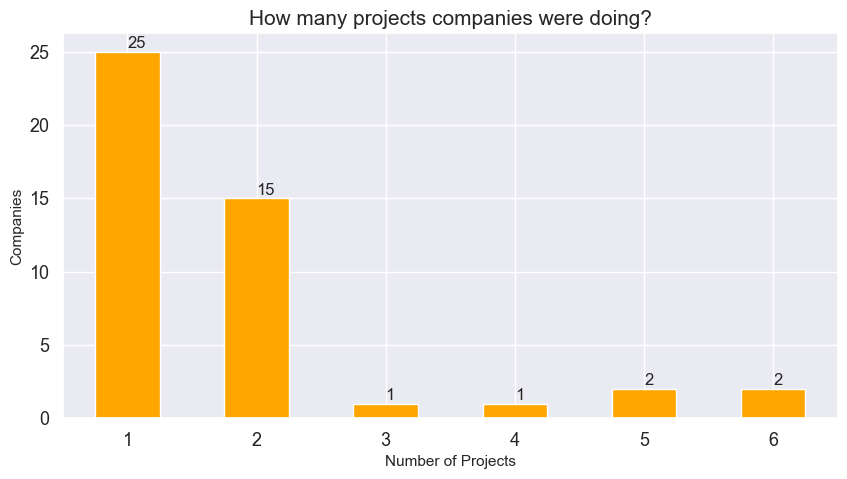

In [77]:
plt.figure(figsize=(10,5))
plt.title('How many projects companies were doing?', fontsize=15)
plt.grid(linestyle='-', linewidth=1)
plt.xlabel('Number of Projects', fontsize=11)
plt.ylabel('Companies', fontsize=11)
space_projects['Entidade'].value_counts().value_counts().sort_index().plot(kind='bar',
                                                                           color='orange',
                                                                           rot=0,
                                                                           fontsize=13)
for i, n in enumerate(space_projects['Entidade'].value_counts().value_counts().sort_index()):
    plt.text(i,n+0.25,n)

plt.show()

From the start we can tell that the vast majority of companies are granted funds to 1 or 2 projects, almost 86% of them. That information on its own can't tell us much about the projects, but it is something to start paint the whole picture of the situation regarding these funds. Companies tend to no be funded by FAPESP for more than 2 projects.

## How long does the projects last?

Another important caracteristic about the projects are their duration, how much time the company will spend invested on it. Let's work on it. Since we're talking about technology development projects, I'll set the time parameter in months (comercial, 30 days) so we can better visualize the results.

In [40]:
project_duration = space_projects['Data de Término'] - space_projects['Data de Início']
project_duration = project_duration/pd.Timedelta(days=30)

Let's first check some measures of central tendency that can tell us about the distribution of time duration of the projects

In [72]:
project_duration.describe()

count    84.000000
mean     23.502778
std      15.433041
min       6.000000
25%       9.100000
50%      24.300000
75%      30.683333
max      87.233333
dtype: float64

Those numbers can already tell something: The projects usually are short-timed, 75% ranging from 6 months up to 2 years and a half. That is a good hint: The development of new technology must be accelerated, following the global trend of dynamization of the space industry. It seems that FAPESP rewards those companies which can manage their ambitious and deliver results faster, than those who take longer. 

We can continue by plotting a boxplot to have an idea about the distribution of that variable.

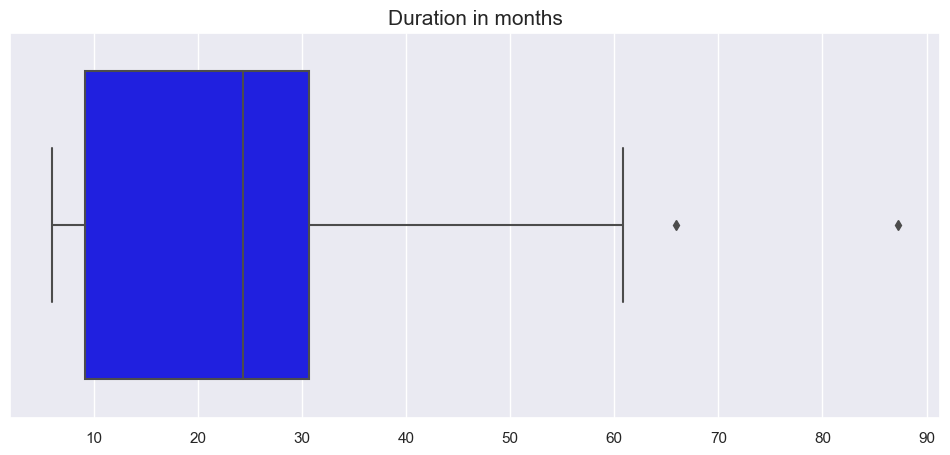

In [86]:
plt.figure(figsize=(12,5))
sns.boxplot(x=project_duration,orient='h', color='blue')
plt.title('Duration in months', fontsize = 15)
plt.show()

That is interesting. As we can see from the boxplot above, most projects are no longer than 30 months. This may indicate a preference for shorter timespans by FAPESP, which can suggest that proposing projects to be executed in less than 30 and a few months increases the likehood of it being funded.

Let's plot the histogram for this distribution, and let's define the intervals being years (12 month lenght)

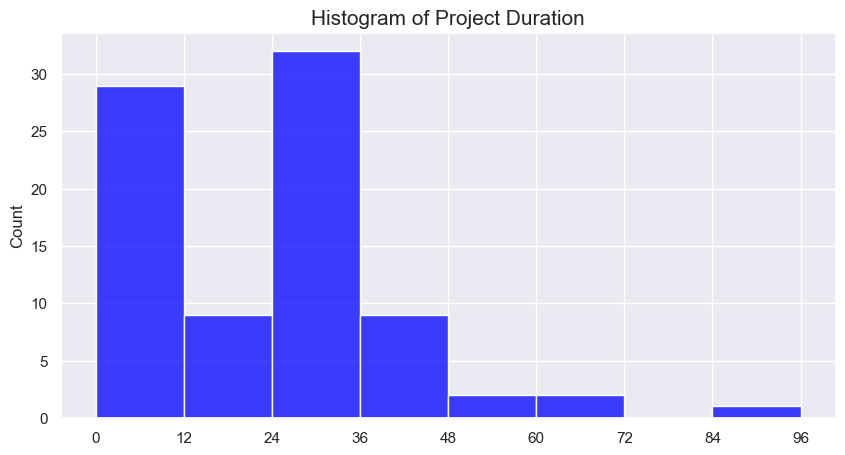

In [87]:
plt.figure(figsize=(10,5))
sns.histplot(project_duration, bins=[12*i for i in range(9)], color='blue')
plt.xticks([12*i for i in range(9)])
plt.title('Histogram of Project Duration', fontsize=15)
plt.show()

Now it becames clearer now the most commom timespan for projects are up to 1 year and between 2-3 years.

## Projects Start and End dates by Year